<img src="https://i.imgur.com/RGQekkH.png" alt="alt text" width="300" height="300">


**Authored by Shashank Raj using Gemini AI ✨.**

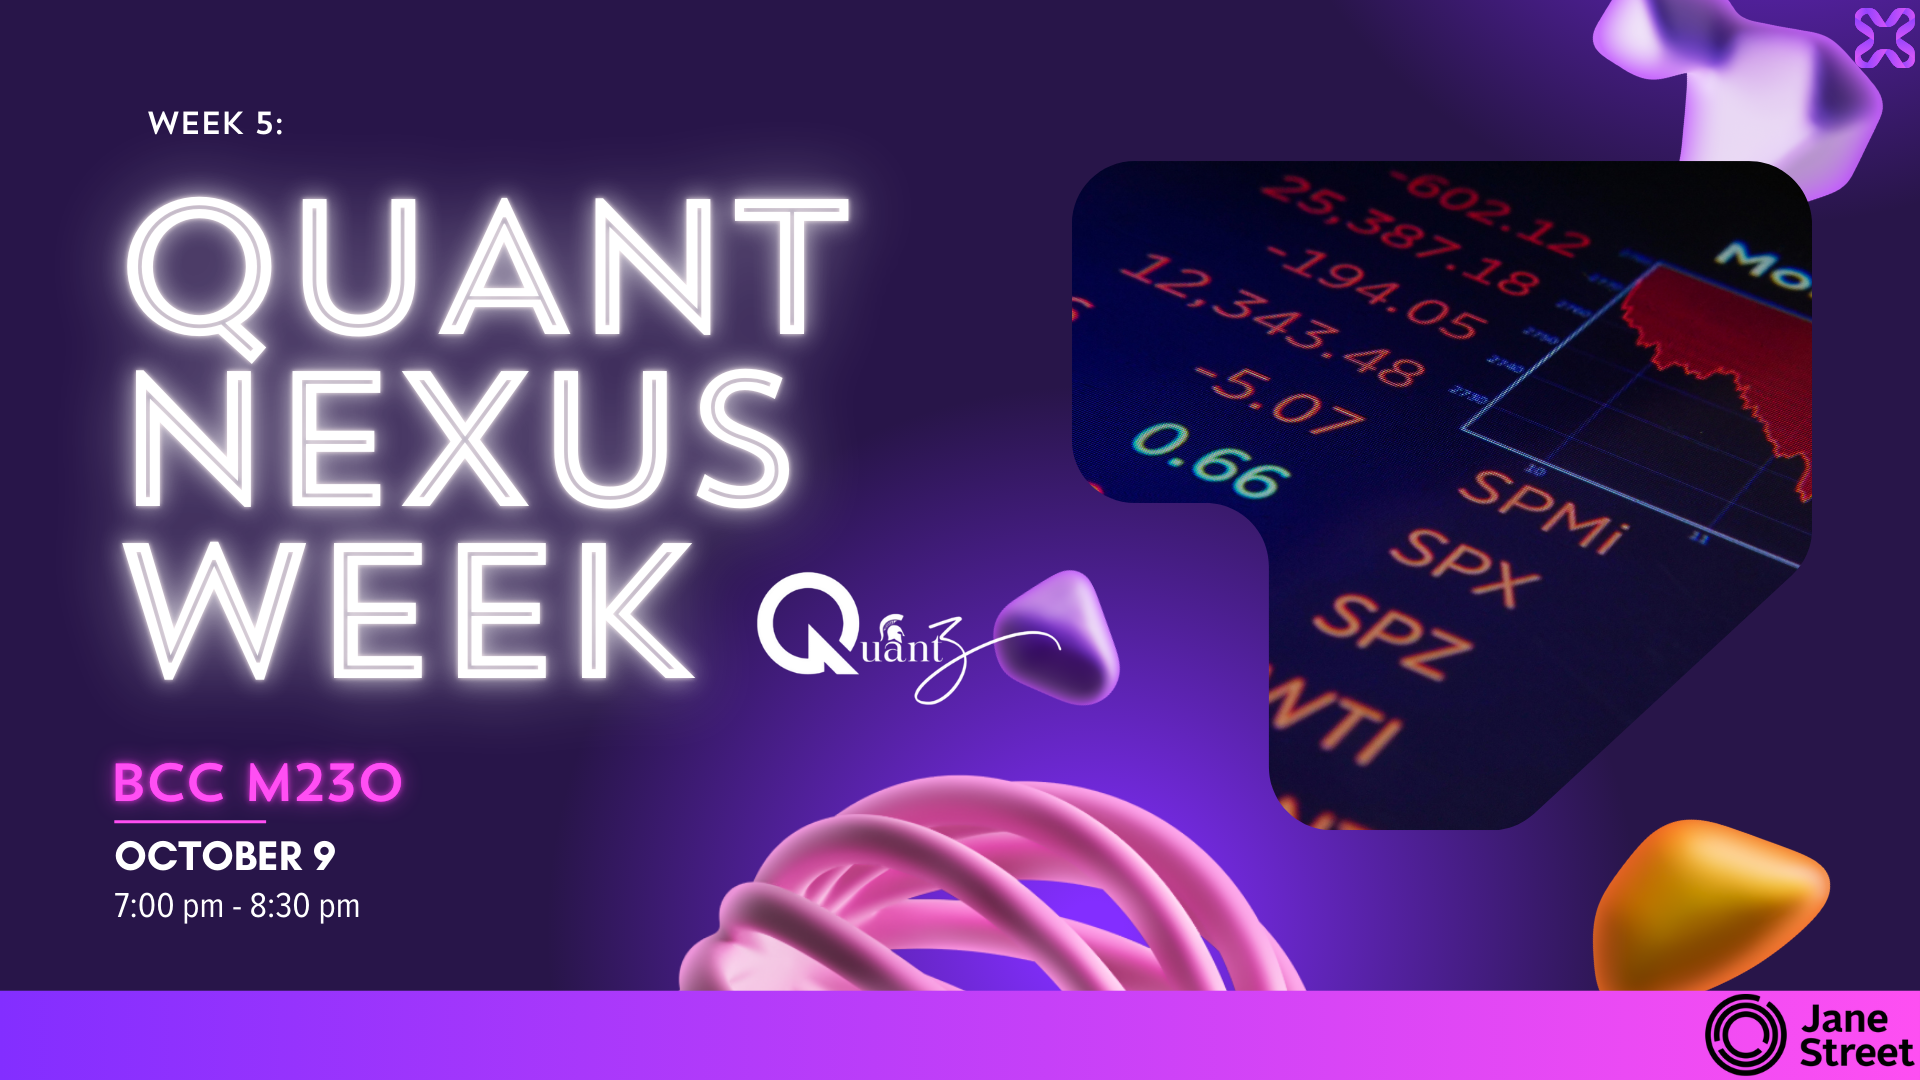

In [ ]:
# @title Derivatives Duel 2.0 ⚔️📉 - Ultimate Trading Simulation {"display-mode":"form"}

!pip install -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix --quiet


import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Apply styling for better visuals
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

def derivatives_duel():
    # ============================
    # ==== GAME PARAMETERS =======
    # ============================
    INITIAL_CAPITAL = 10000  # Starting capital in $
    NUM_ROUNDS = 10  # Total number of rounds
    CONTRACT_TYPES = ['Call Option', 'Put Option', 'Futures Contract']
    ASSET_NAME = 'Stock XYZ'
    ASSET_INITIAL_PRICE = 100  # Starting price in $

    # ============================
    # ==== INITIALIZE GAME STATE ==
    # ============================
    capital = INITIAL_CAPITAL
    portfolio = {
        'Call Option': {'quantity': 0, 'strike_price': 0, 'premium': 0},
        'Put Option': {'quantity': 0, 'strike_price': 0, 'premium': 0},
        'Futures Contract': {'quantity': 0, 'leverage': 1}
    }
    capital_history = [capital]
    score = 0
    penalties = 0
    current_round = 1
    asset_price = ASSET_INITIAL_PRICE
    trade_history = []

    # Generate Market Conditions for Each Round with increased volatility
    market_conditions = []
    for _ in range(NUM_ROUNDS):
        condition = random.choices(
            ['Bull Market', 'Bear Market', 'Sideways Market', 'Volatile Market'],
            weights=[30, 30, 25, 15],
            k=1
        )[0]
        market_conditions.append(condition)

    # ============================
    # ======= DEFINE WIDGETS =====
    # ============================

    # Introductory Label
    intro_label = widgets.HTML(value=f"""
        <h1 style="color: #2E86C1;">⚔️ Derivatives Duel 📉</h1>
        <p>Welcome to the <b>Derivatives Duel</b>! Engage in a thrilling trading competition where you strategize using <b>options</b> and <b>futures contracts</b> on <b>{ASSET_NAME}</b> over <b>{NUM_ROUNDS}</b> intense rounds.</p>
        <ul>
            <li><b>Initial Capital:</b> ${INITIAL_CAPITAL}</li>
            <li><b>Objective:</b> Maximize your portfolio's returns while effectively managing risks.</li>
            <li><b>Game Mechanics:</b> Buy/Sell various derivatives based on dynamic market conditions.</li>
        </ul>
        <p>Are you ready to duel?</p>
    """)

    # Start Button
    start_button = widgets.Button(
        description='Start Duel',
        button_style='success',
        icon='play',
        layout=widgets.Layout(width='200px', height='50px'),
        style={'font_weight': 'bold'}
    )

    # Trading Controls
    trade_type_dropdown = widgets.Dropdown(
        options=CONTRACT_TYPES,
        value=CONTRACT_TYPES[0],
        description='Contract Type:',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='60%')
    )

    action_dropdown = widgets.Dropdown(
        options=['Buy', 'Sell'],
        value='Buy',
        description='Action:',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='60%')
    )

    quantity_slider = widgets.IntSlider(
        value=0,
        min=0,
        max=100,
        step=1,
        description='Quantity:',
        style={'description_width': '150px'},
        continuous_update=False,
        layout=widgets.Layout(width='80%')
    )

    # Additional Parameters for Options
    strike_price_input = widgets.FloatText(
        value=100.0,
        description='Strike Price:',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='60%')
    )

    premium_display = widgets.HTML(value="Premium: $0.00")

    # Proceed Button
    proceed_button = widgets.Button(
        description='Proceed to Next Round',
        button_style='info',
        icon='arrow-right',
        disabled=True,
        layout=widgets.Layout(width='250px', height='50px')
    )

    # Output Area for Round Summary
    output_area = widgets.Output()

    # Score Labels
    progress_label = widgets.HTML(value=f"<b>Round:</b> {current_round} / {NUM_ROUNDS}")
    score_label = widgets.HTML(value=f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}")
    capital_label = widgets.HTML(value=f"<b>Capital:</b> ${capital:.2f}")
    asset_price_label = widgets.HTML(value=f"<b>Asset Price:</b> ${asset_price:.2f}")

    # Portfolio Display
    portfolio_display = widgets.HTML(value="**Portfolio:**<br>None")

    # Progress Bar
    progress_bar = widgets.FloatProgress(
        value=0.0,
        min=0.0,
        max=1.0,
        description='Progress:',
        bar_style='info',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='100%')
    )

    # Display Widgets Container
    game_ui_container = widgets.VBox([
        widgets.HBox([progress_label, progress_bar]),
        widgets.HBox([score_label, capital_label]),
        asset_price_label,
        portfolio_display,
        widgets.HBox([trade_type_dropdown, action_dropdown]),
        widgets.HBox([quantity_slider, strike_price_input]),
        premium_display,
        proceed_button,
        output_area
    ])

    # ============================
    # ====== DEFINE FUNCTIONS =====
    # ============================

    # Function to simulate market movement
    def simulate_market(market_condition):
        nonlocal asset_price
        # Simulate asset price movement based on market condition with increased volatility
        if market_condition == 'Bull Market':
            change_percent = random.uniform(0.05, 0.15)  # 5% to 15% increase
        elif market_condition == 'Bear Market':
            change_percent = random.uniform(-0.15, -0.05)  # 5% to 15% decrease
        elif market_condition == 'Sideways Market':
            change_percent = random.uniform(-0.03, 0.03)  # -3% to 3% change
        elif market_condition == 'Volatile Market':
            change_percent = random.uniform(-0.2, 0.2)  # -20% to 20% swing
        else:
            change_percent = 0.0  # No change

        asset_price *= (1 + change_percent)
        asset_price = round(asset_price, 2)
        return change_percent

    # Function to calculate premium for options
    def calculate_premium(contract_type, strike_price):
        intrinsic = max(0, asset_price - strike_price) if contract_type == 'Call Option' else max(0, strike_price - asset_price)
        time_value = asset_price * 0.05  # Simplified time value
        premium = intrinsic + time_value
        return round(premium, 2)

    # Function to execute trade
    def execute_trade(trade_type, action, quantity, strike_price=None):
        nonlocal capital, portfolio, asset_price, score, penalties
        if trade_type in ['Call Option', 'Put Option']:
            if strike_price is None:
                return False, "Strike price must be specified for options."
            premium = calculate_premium(trade_type, strike_price)
            contract_price = premium
        elif trade_type == 'Futures Contract':
            leverage = 2  # Fixed leverage for simplicity
            contract_price = asset_price * leverage
        else:
            contract_price = asset_price

        total_cost = quantity * contract_price

        if action == 'Buy':
            if total_cost > capital:
                penalties += 1
                return False, f"❌ Insufficient capital to buy {quantity} {trade_type}(s). Required: ${total_cost:.2f}, Available: ${capital:.2f}"
            capital -= total_cost
            if trade_type in ['Call Option', 'Put Option']:
                portfolio[trade_type]['quantity'] += quantity
                portfolio[trade_type]['strike_price'] = strike_price
                portfolio[trade_type]['premium'] = premium
            else:
                portfolio[trade_type]['quantity'] += quantity
                portfolio[trade_type]['leverage'] = 2
            score += 1
            return True, f"✅ Bought {quantity} {trade_type}(s) for ${total_cost:.2f}"
        elif action == 'Sell':
            if quantity > portfolio[trade_type]['quantity']:
                penalties += 1
                return False, f"❌ Insufficient {trade_type} contracts to sell. You have: {portfolio[trade_type]['quantity']} contracts"
            capital += total_cost
            portfolio[trade_type]['quantity'] -= quantity
            score += 1
            return True, f"✅ Sold {quantity} {trade_type}(s) for ${total_cost:.2f}"
        else:
            return False, "❌ Invalid action."

    # Function to update premium display based on selected contract and strike price
    def update_premium(*args):
        trade_type = trade_type_dropdown.value
        if trade_type in ['Call Option', 'Put Option']:
            strike_price = strike_price_input.value
            premium = calculate_premium(trade_type, strike_price)
            premium_display.value = f"**Premium:** ${premium:.2f}"
        else:
            premium_display.value = "Premium: N/A"

    trade_type_dropdown.observe(update_premium, names='value')
    strike_price_input.observe(update_premium, names='value')

    # Function to handle proceed button click
    def proceed_round(b):
        nonlocal current_round, score, penalties, capital, asset_price, portfolio, capital_history, trade_history

        # Get trade inputs
        trade_type = trade_type_dropdown.value
        action = action_dropdown.value
        quantity = quantity_slider.value
        strike_price = strike_price_input.value if trade_type in ['Call Option', 'Put Option'] else None

        # Validate trade
        if quantity <= 0:
            with output_area:
                clear_output()
                print("❌ Quantity must be greater than 0.")
            penalties += 1
            score_label.value = f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}"
            return

        # Execute trade
        success, message = execute_trade(trade_type, action, quantity, strike_price)

        with output_area:
            clear_output()
            print(message)

        # Record trade history
        trade_history.append({
            'Round': current_round,
            'Action': action,
            'Contract': trade_type,
            'Quantity': quantity,
            'Strike Price': strike_price if strike_price else '-',
            'Asset Price': asset_price
        })

        # Simulate market movement
        current_market = market_conditions[current_round - 1]
        change_percent = simulate_market(current_market)

        # Display market condition and price change
        with output_area:
            print(f"**Market Condition:** {current_market}")
            if change_percent > 0:
                print(f"📈 Market Up! {change_percent*100:.2f}% increase.")
            elif change_percent < 0:
                print(f"📉 Market Down! {abs(change_percent)*100:.2f}% decrease.")
            else:
                print(f"🔄 Market Stable. No significant change.")
            print(f"**New Asset Price:** ${asset_price:.2f}")

        # Update portfolio value
        capital_history.append(capital)

        # Update score and penalties
        score_label.value = f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}"
        capital_label.value = f"<b>Capital:</b> ${capital:.2f}"
        asset_price_label.value = f"<b>Asset Price:</b> ${asset_price:.2f}"

        # Update portfolio display
        portfolio_text = "<b>Portfolio:</b><br>"
        for contract, details in portfolio.items():
            if details['quantity'] > 0:
                portfolio_text += f"{contract}: {details['quantity']} contracts<br>"
        portfolio_display.value = portfolio_text if any(details['quantity'] > 0 for details in portfolio.values()) else "**Portfolio:** None"

        # Update progress bar
        progress_bar.value = current_round / NUM_ROUNDS

        # Increment round
        current_round += 1
        if current_round <= NUM_ROUNDS:
            progress_label.value = f"<b>Round:</b> {current_round} / {NUM_ROUNDS}"
            # Reset trade inputs for next round
            trade_type_dropdown.value = CONTRACT_TYPES[0]
            action_dropdown.value = 'Buy'
            quantity_slider.value = 0
            strike_price_input.value = ASSET_INITIAL_PRICE
            update_premium()
            with output_area:
                print(f"**Round {current_round} Begins!**")
                print(f"You have ${capital:.2f} to trade.")
                print(f"Market Condition: {market_conditions[current_round - 1]}")
                print("Select your trade and click 'Proceed to Next Round'.")
        else:
            end_game()

    # Function to end the game
    def end_game():
        nonlocal capital_history, trade_history
        clear_output(wait=True)

        # Calculate final score
        final_score = score - penalties

        # Display Final Results
        final_label = widgets.HTML(value=f"""
            <h2 style="color: #27AE60;">🏁 Duel Over! 🏁</h2>
            <p><b>Final Score:</b> {final_score}</p>
            <p><b>Final Capital:</b> ${capital:.2f}</p>
            <p><b>Final Asset Price:</b> ${asset_price:.2f}</p>
        """)

        # Plot Portfolio Value Over Time
        rounds = list(range(1, len(capital_history) + 1))
        plt.figure(figsize=(14, 7))
        sns.lineplot(x=rounds, y=capital_history, marker='o', color='blue')
        plt.title('📈 Portfolio Value Over Time')
        plt.xlabel('Round')
        plt.ylabel('Capital ($)')
        plt.xticks(rounds)
        plt.ylim(0, max(capital_history) * 1.2)
        plt.grid(True)
        plt.show()

        # Display Trade History
        trade_history_df = pd.DataFrame(trade_history)
        display(widgets.HTML("<h3>📋 Trade History:</h3>"))
        display(trade_history_df)

        # Display Final Label
        display(final_label)

    # Function to update trade type and enable/disable strike price input
    def update_trade_type(*args):
        trade_type = trade_type_dropdown.value
        if trade_type in ['Call Option', 'Put Option']:
            strike_price_input.layout.visibility = 'visible'
            strike_price_input.disabled = False
            update_premium()
        else:
            strike_price_input.layout.visibility = 'hidden'
            strike_price_input.disabled = True
            premium_display.value = "Premium: N/A"

    trade_type_dropdown.observe(update_trade_type, names='value')

    # Function to start the game
    def start_game(b):
        nonlocal current_round, score, penalties, capital, portfolio, capital_history, asset_price, trade_history
        clear_output(wait=True)
        display(game_ui_container)
        with output_area:
            clear_output()
            print(f"**Game Started!**")
            print(f"You have ${capital:.2f} to trade.")
            print(f"**Current Asset Price:** ${asset_price:.2f}")
            print(f"**Market Condition for Round {current_round}:** {market_conditions[current_round - 1]}")
            print("Select your trade and click 'Proceed to Next Round'.")

        # Reset Game State
        current_round = 1
        score = 0
        penalties = 0
        capital = INITIAL_CAPITAL
        portfolio = {contract: {'quantity': 0, 'strike_price': 0, 'premium': 0} for contract in CONTRACT_TYPES}
        capital_history = [capital]
        asset_price = ASSET_INITIAL_PRICE
        trade_history = []
        progress_label.value = f"<b>Round:</b> {current_round} / {NUM_ROUNDS}"
        progress_bar.value = 0.0
        score_label.value = f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}"
        capital_label.value = f"<b>Capital:</b> ${capital:.2f}"
        asset_price_label.value = f"<b>Asset Price:</b> ${asset_price:.2f}"
        portfolio_display.value = "**Portfolio:** None"
        proceed_button.disabled = False
        # Reset Widgets
        trade_type_dropdown.value = CONTRACT_TYPES[0]
        action_dropdown.value = 'Buy'
        quantity_slider.value = 0
        strike_price_input.value = ASSET_INITIAL_PRICE
        update_premium()

    # Attach event handlers
    start_button.on_click(start_game)
    proceed_button.on_click(proceed_round)

    # ============================
    # ====== INITIAL DISPLAY ======
    # ============================
    display(widgets.VBox([intro_label, start_button]))

    # ============================
    # ====== ADDITIONAL FEATURES ===
    # ============================

    # Display portfolio as a table
    import pandas as pd
    from IPython.display import HTML

    def display_portfolio():
        df = pd.DataFrame(portfolio).T
        df = df[df['quantity'] > 0]
        if df.empty:
            return "None"
        return df.style.hide_index()

    portfolio_display.value = display_portfolio()

    # Enhance visual appeal with custom CSS
    from IPython.core.display import HTML as HTMLDisplay
    display(HTMLDisplay("""
        <style>
            .widget-label { font-weight: bold; color: #2980B9; }
            .output_wrapper, .output {
                height: auto !important;
                max-height: none !important;
            }
            .jp-RenderedHTMLCommon {
                font-size: 14px;
            }
        </style>
    """))

# Run the Derivatives Duel Game
derivatives_duel()


In [3]:
# @title Signal Surge 📡📈 - Advanced Signal Processing and Trading Strategy Game - Ultimate Trading Simulation {"display-mode":"form"}

# Install and import necessary packages
# Uncomment the following lines if running in a fresh environment
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt
import random
from scipy.signal import butter, lfilter
import seaborn as sns

# Apply styling for better visuals
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)

def signal_surge():
    # ============================
    # ==== GAME PARAMETERS =======
    # ============================
    INITIAL_CAPITAL = 10000  # Starting capital in $
    NUM_ROUNDS = 10  # Total number of rounds
    DATA_POINTS = 500  # Number of data points per round
    ASSET_NAME = 'SignalStock'

    # ============================
    # ==== INITIALIZE GAME STATE ==
    # ============================
    capital = INITIAL_CAPITAL
    portfolio = {'Long': 0, 'Short': 0}
    capital_history = [capital]
    score = 0
    penalties = 0
    current_round = 1
    trading_history = []

    # ============================
    # ==== GENERATE MARKET DATA ===
    # ============================
    def generate_market_data():
        # Simulate random walk for asset price with drift and volatility
        price = 100
        drift = 0.0002  # Small positive drift
        volatility = 0.01  # Daily volatility
        data = []
        for _ in range(DATA_POINTS):
            change_percent = np.random.normal(drift, volatility)
            price *= (1 + change_percent)
            price = round(price, 2)
            data.append(price)
        return data

    market_data_rounds = [generate_market_data() for _ in range(NUM_ROUNDS)]

    # ============================
    # ======= DEFINE WIDGETS =====
    # ============================

    # Introductory Label
    intro_label = widgets.HTML(value=f"""
        <h1 style="color: #2980B9;">📡 Signal Surge 📈</h1>
        <p>Welcome to <b>Signal Surge</b>! Challenge yourself by developing and optimizing trading strategies based on advanced <b>signal processing techniques</b> over <b>{NUM_ROUNDS}</b> intense rounds. Process real-time financial data streams, apply various signal processing methods to generate trading signals, and execute trades to maximize your portfolio's returns. Good luck!</p>
        <ul>
            <li><b>Initial Capital:</b> ${INITIAL_CAPITAL}</li>
            <li><b>Asset:</b> {ASSET_NAME}</li>
            <li><b>Data Points per Round:</b> {DATA_POINTS}</li>
        </ul>
        <p>Click the <b>"Start Surge"</b> button to begin your trading journey!</p>
    """)

    # Start Button
    start_button = widgets.Button(
        description='Start Surge',
        button_style='success',
        icon='play',
        layout=widgets.Layout(width='200px', height='50px'),
        style={'font_weight': 'bold'}
    )

    # Strategy Selection Dropdown
    strategy_dropdown = widgets.Dropdown(
        options=[
            'Moving Average Crossover',
            'Butterworth Low-Pass Filter',
            'Fourier Transform Signal Extraction'
        ],
        value='Moving Average Crossover',
        description='Strategy:',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='60%')
    )

    # Strategy Parameters Widgets

    # Moving Average Crossover Parameters
    short_window_slider = widgets.IntSlider(
        value=10,
        min=1,
        max=50,
        step=1,
        description='Short Window:',
        style={'description_width': '150px'},
        continuous_update=False
    )

    long_window_slider = widgets.IntSlider(
        value=30,
        min=1,
        max=100,
        step=1,
        description='Long Window:',
        style={'description_width': '150px'},
        continuous_update=False
    )

    # Butterworth Low-Pass Filter Parameters
    cutoff_slider = widgets.FloatSlider(
        value=0.1,
        min=0.01,
        max=0.5,
        step=0.01,
        description='Cutoff Frequency:',
        style={'description_width': '150px'},
        continuous_update=False
    )

    order_slider = widgets.IntSlider(
        value=2,
        min=1,
        max=5,
        step=1,
        description='Filter Order:',
        style={'description_width': '150px'},
        continuous_update=False
    )

    # Fourier Transform Signal Extraction Parameters
    fft_range_slider = widgets.IntSlider(
        value=50,
        min=10,
        max=100,
        step=10,
        description='FFT Range:',
        style={'description_width': '150px'},
        continuous_update=False
    )

    # Parameter Containers
    ma_parameters = widgets.VBox([short_window_slider, long_window_slider])
    butter_parameters = widgets.VBox([cutoff_slider, order_slider])
    fft_parameters = widgets.VBox([fft_range_slider])

    parameter_widgets_container = widgets.VBox([ma_parameters, butter_parameters, fft_parameters])

    # Initially hide all parameters
    ma_parameters.layout.display = 'none'
    butter_parameters.layout.display = 'none'
    fft_parameters.layout.display = 'none'

    # Proceed Button
    proceed_button = widgets.Button(
        description='Execute Strategy & Proceed',
        button_style='info',
        icon='arrow-right',
        disabled=True,
        layout=widgets.Layout(width='250px', height='50px')
    )

    # Output Area for Round Summary
    output_area = widgets.Output()

    # Score Labels
    progress_label = widgets.HTML(value=f"<b>Round:</b> {current_round} / {NUM_ROUNDS}")
    score_label = widgets.HTML(value=f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}")
    capital_label = widgets.HTML(value=f"<b>Capital:</b> ${capital:.2f}")

    # Leaderboard
    leaderboard = pd.DataFrame(columns=['Player', 'Score', 'Penalties', 'Capital'])
    leaderboard.loc[0] = ['You', score, penalties, capital]
    leaderboard_widget = widgets.Output()

    # Display Widgets Container
    game_ui_container = widgets.VBox([
        progress_label,
        score_label,
        capital_label,
        strategy_dropdown,
        parameter_widgets_container,
        proceed_button,
        output_area,
        widgets.HTML(value="<h3>🏆 Leaderboard 🏆</h3>"),
        leaderboard_widget
    ])

    # ============================
    # ====== DEFINE FUNCTIONS =====
    # ============================

    # Function to update leaderboard
    def update_leaderboard():
        nonlocal leaderboard
        with leaderboard_widget:
            clear_output(wait=True)
            display(leaderboard.sort_values(by='Score', ascending=False).reset_index(drop=True))

    # Function to start the game
    def start_game(b):
        nonlocal current_round, score, penalties, capital, portfolio, capital_history, trading_history
        clear_output(wait=True)
        display(game_ui_container)
        with output_area:
            clear_output()
            print(f"**Game Started!**")
            print(f"You have ${capital:.2f} to trade.")
            print(f"**Round {current_round} Begins!**")
            print(f"Executing Strategy: {strategy_dropdown.value}")
            print("Configure your strategy parameters and click 'Execute Strategy & Proceed'.")
        # Reset Game State
        current_round = 1
        score = 0
        penalties = 0
        capital = INITIAL_CAPITAL
        portfolio = {'Long': 0, 'Short': 0}
        capital_history = [capital]
        trading_history = []
        progress_label.value = f"<b>Round:</b> {current_round} / {NUM_ROUNDS}"
        score_label.value = f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}"
        capital_label.value = f"<b>Capital:</b> ${capital:.2f}"
        proceed_button.disabled = False
        # Hide all parameters initially
        ma_parameters.layout.display = 'none'
        butter_parameters.layout.display = 'none'
        fft_parameters.layout.display = 'none'
        # Reset strategy parameters to defaults
        short_window_slider.value = 10
        long_window_slider.value = 30
        cutoff_slider.value = 0.1
        order_slider.value = 2
        fft_range_slider.value = 50
        update_leaderboard()

    start_button.on_click(start_game)

    # Function to show parameters based on strategy
    def show_parameters(change):
        strategy = strategy_dropdown.value
        # Hide all first
        ma_parameters.layout.display = 'none'
        butter_parameters.layout.display = 'none'
        fft_parameters.layout.display = 'none'
        if strategy == 'Moving Average Crossover':
            ma_parameters.layout.display = 'flex'
        elif strategy == 'Butterworth Low-Pass Filter':
            butter_parameters.layout.display = 'flex'
        elif strategy == 'Fourier Transform Signal Extraction':
            fft_parameters.layout.display = 'flex'
        validate_proceed_button()

    strategy_dropdown.observe(show_parameters, names='value')

    # Function to validate and enable proceed button
    def validate_proceed_button(*args):
        strategy = strategy_dropdown.value
        if strategy == 'Moving Average Crossover':
            if short_window_slider.value >= long_window_slider.value:
                proceed_button.disabled = True
                # Optionally, display a tooltip or message
            else:
                proceed_button.disabled = False
        else:
            proceed_button.disabled = False

    # Observe parameter sliders for validation
    short_window_slider.observe(validate_proceed_button, names='value')
    long_window_slider.observe(validate_proceed_button, names='value')

    # Function to execute strategy and proceed to next round
    def execute_strategy_and_proceed(b):
        nonlocal current_round, score, penalties, capital, portfolio, capital_history, trading_history
        strategy = strategy_dropdown.value
        data = market_data_rounds[current_round - 1]
        executed_trades = []
        profit_loss = 0  # Initialize profit/loss

        # Apply selected strategy to generate trading signals
        if strategy == 'Moving Average Crossover':
            short_window = short_window_slider.value
            long_window = long_window_slider.value
            short_ma = pd.Series(data).rolling(window=short_window).mean()
            long_ma = pd.Series(data).rolling(window=long_window).mean()
            signals = pd.DataFrame(index=range(len(data)))
            signals['Short_MA'] = short_ma
            signals['Long_MA'] = long_ma
            signals['Signal'] = 0
            # Use .loc to avoid SettingWithCopyWarning
            signals.loc[short_window:, 'Signal'] = np.where(signals.loc[short_window:, 'Short_MA'] > signals.loc[short_window:, 'Long_MA'], 1, -1)
            signals['Position'] = signals['Signal'].diff()
            latest_signal = signals['Signal'].iloc[-1]

            if latest_signal == 1:
                action = 'Buy'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            elif latest_signal == -1:
                action = 'Sell'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            else:
                action = 'Hold'
                quantity = 0

        elif strategy == 'Butterworth Low-Pass Filter':
            cutoff = cutoff_slider.value
            order = order_slider.value
            nyq = 0.5  # Nyquist Frequency
            normal_cutoff = cutoff / nyq
            b, a = butter(order, normal_cutoff, btype='low', analog=False)
            filtered = lfilter(b, a, data)
            change = filtered[-1] - filtered[-2]
            if change > 0:
                action = 'Buy'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            elif change < 0:
                action = 'Sell'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            else:
                action = 'Hold'
                quantity = 0

        elif strategy == 'Fourier Transform Signal Extraction':
            fft_range = fft_range_slider.value
            fft_values = np.fft.fft(data)
            frequencies = np.fft.fftfreq(len(data))
            fft_magnitude = np.abs(fft_values)
            # Select top 'fft_range' frequencies
            top_indices = np.argsort(fft_magnitude)[-fft_range:]
            significant_frequencies = frequencies[top_indices]
            dominant_freq = significant_frequencies[np.argmax(fft_magnitude[top_indices])]

            if dominant_freq > 0:
                action = 'Buy'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            elif dominant_freq < 0:
                action = 'Sell'
                quantity = int(capital * 0.1 / data[-1])  # Invest 10% capital
            else:
                action = 'Hold'
                quantity = 0
        else:
            action = 'Hold'
            quantity = 0

        # Execute trade based on signal
        if action == 'Buy':
            if capital >= data[-1] * quantity:
                capital -= data[-1] * quantity
                portfolio['Long'] += quantity
                executed_trades.append(f"✅ Bought {quantity} units at ${data[-1]:.2f} each.")
            else:
                penalties += 1
                executed_trades.append(f"❌ Insufficient capital to buy {quantity} units.")
        elif action == 'Sell':
            if portfolio['Long'] >= quantity:
                capital += data[-1] * quantity
                portfolio['Long'] -= quantity
                executed_trades.append(f"✅ Sold {quantity} units at ${data[-1]:.2f} each.")
            else:
                penalties += 1
                executed_trades.append(f"❌ Insufficient units to sell {quantity}.")
        else:
            executed_trades.append("🔄 Hold. No trade executed.")

        # Determine profit/loss
        if portfolio['Long'] > 0:
            profit_loss = (data[-1] - data[0]) * portfolio['Long']
            capital += profit_loss
            if profit_loss > 0:
                score += int(profit_loss / 100)  # Reward: 1 point per $100 profit
                executed_trades.append(f"💰 Profit: +${profit_loss:.2f}")
            elif profit_loss < 0:
                penalties += int(abs(profit_loss) / 100)  # Penalty: 1 point per $100 loss
                executed_trades.append(f"💸 Loss: -${abs(profit_loss):.2f}")

        capital_history.append(capital)
        trading_history.append({
            'Round': current_round,
            'Strategy': strategy,
            'Action': action,
            'Quantity': quantity,
            'Profit/Loss': round(profit_loss, 2)
        })

        # Update score and penalties
        score_label.value = f"<b>Score:</b> {score} | <b>Penalties:</b> {penalties}"
        capital_label.value = f"<b>Capital:</b> ${capital:.2f}"

        # Update leaderboard
        leaderboard.loc[0] = ['You', score, penalties, round(capital, 2)]
        update_leaderboard()

        # Plotting
        with output_area:
            clear_output()
            print(f"**Round {current_round} Summary:**")
            for trade in executed_trades:
                if 'Profit' in trade:
                    print(f"<span style='color: green;'>{trade}</span>")
                elif 'Loss' in trade:
                    print(f"<span style='color: red;'>{trade}</span>")
                else:
                    print(trade)

            # Plot Asset Price and Strategy Signals
            fig, ax = plt.subplots(2, 1, figsize=(14, 10))
            ax[0].plot(market_data_rounds[current_round - 1], label='Asset Price', color='blue')
            ax[0].set_title(f'Round {current_round} - {ASSET_NAME} Price')
            ax[0].set_xlabel('Time')
            ax[0].set_ylabel('Price ($)')
            ax[0].legend()

            ax[1].plot(market_data_rounds[current_round - 1], label='Asset Price', color='blue')
            if strategy == 'Moving Average Crossover':
                ax[1].plot(short_ma, label=f'Short MA ({short_window_slider.value})', color='orange')
                ax[1].plot(long_ma, label=f'Long MA ({long_window_slider.value})', color='magenta')
            elif strategy == 'Butterworth Low-Pass Filter':
                ax[1].plot(filtered, label=f'Butterworth Filtered (Cutoff={cutoff_slider.value})', color='green')
            elif strategy == 'Fourier Transform Signal Extraction':
                # Inverse FFT to get filtered signal
                filtered_fft = np.real(np.fft.ifft(fft_values * (np.abs(fft_values) > np.percentile(fft_magnitude, 100 - fft_range_slider.value))))
                ax[1].plot(filtered_fft, label=f'FFT Filtered (Top {fft_range_slider.value} Frequencies)', color='red')
            ax[1].set_title(f'Round {current_round} - Strategy Signals')
            ax[1].set_xlabel('Time')
            ax[1].set_ylabel('Price ($)')
            ax[1].legend()

            plt.tight_layout()
            plt.show()

            # Plot Portfolio Value Over Time
            plt.figure(figsize=(14, 7))
            sns.lineplot(x=list(range(1, len(capital_history))), y=capital_history[1:], marker='o', color='green')
            plt.title('📈 Portfolio Value Over Time')
            plt.xlabel('Round')
            plt.ylabel('Capital ($)')
            plt.xticks(range(1, NUM_ROUNDS + 1))
            plt.grid(True)
            plt.show()

        # Increment round
        current_round += 1
        if current_round > NUM_ROUNDS:
            end_game()
        else:
            # Proceed to next round
            progress_label.value = f"<b>Round:</b> {current_round} / {NUM_ROUNDS}"
            with output_area:
                print(f"**Round {current_round} Begins!**")
                print(f"You have ${capital:.2f} to trade.")
                print(f"Executing Strategy: {strategy_dropdown.value}")
                print("Configure your strategy parameters and click 'Execute Strategy & Proceed'.")

    proceed_button.on_click(execute_strategy_and_proceed)

    # Function to calculate final rating
    def calculate_final_rating(final_score):
        if final_score >= 150:
            return "🎖️ Signal Master!"
        elif final_score >= 100:
            return "🏆 Elite Strategist!"
        elif final_score >= 70:
            return "💼 Skilled Trader!"
        elif final_score >= 40:
            return "📈 Competent Investor!"
        else:
            return "😕 Needs Improvement!"

    # Function to end the game
    def end_game():
        nonlocal score, penalties, capital_history, trading_history
        clear_output(wait=True)
        # Calculate final score
        final_score = score - penalties
        rating = calculate_final_rating(final_score)

        # Display Final Results
        final_label = widgets.HTML(value=f"""
            <h2 style="color: #27AE60;">🏁 Surge Over! 🏁</h2>
            <p><b>Final Score:</b> {final_score}</p>
            <p><b>Rating:</b> {rating}</p>
        """)

        # Plot Portfolio Value Over Time
        rounds = list(range(1, NUM_ROUNDS + 1))
        plt.figure(figsize=(14, 7))
        sns.lineplot(x=rounds, y=capital_history[1:], marker='o', color='green')
        plt.title('📈 Portfolio Value Over Time')
        plt.xlabel('Round')
        plt.ylabel('Capital ($)')
        plt.xticks(rounds)
        plt.grid(True)
        plt.show()

        # Display Trade History
        trade_history_df = pd.DataFrame(trading_history)
        trade_history_df = trade_history_df[['Round', 'Strategy', 'Action', 'Quantity', 'Profit/Loss']]
        display(widgets.HTML("<h3>📋 Trade History:</h3>"))
        display(trade_history_df.style.hide_index())

        # Display Final Label and Leaderboard
        display(final_label)
        update_leaderboard()

    # ============================
    # ====== INITIAL DISPLAY ======
    # ============================
    display(widgets.VBox([intro_label, start_button]))

    # ============================
    # ====== ADDITIONAL FEATURES ===
    # ============================

    # Custom CSS for better aesthetics
    display(HTML("""
        <style>
            .widget-label { font-weight: bold; color: #2980B9; }
            .output_wrapper, .output {
                height: auto !important;
                max-height: none !important;
            }
            .jp-RenderedHTMLCommon {
                font-size: 14px;
            }
            .custom-button-style {
                background-color: #2980B9;
                color: white;
            }
        </style>
    """))

# Run the Signal Surge Game
signal_surge()
